In [1]:
import json, os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, LdaMulticore, CoherenceModel
# from helpers import load_tweets, compute_coherence_values

In [4]:
import random
def load_tweets(filenames, preprocessor=None, subsample_proportion=1):

    all_tweets = []
    for filename in filenames:
        with open(filename, 'r') as f:
            # add commas between tweets to correct json syntax
            data = json.loads('['+f.read().replace('}{','},{')+']')
        # remove retweets
        tweets = [tweet for tweet in data if 'retweeted_status' not in tweet]
        # keep english language tweets only
        tweets = [tweet for tweet in tweets if tweet['lang'] == 'en']

        # take tweet text  or full_text if the tweet has that attribute
        to_save = []
        for tweet in tweets:
            if 'full_text' in tweet:
                ttext = tweet['full_text']
            elif 'extended_tweet' in tweet and 'full_text' in tweet['extended_tweet']:
                ttext = tweet['extended_tweet']['full_text']
            else:
                ttext = tweet['text']

            date = tweet['created_at']

            to_save.append((date, ttext))

        all_tweets = all_tweets + to_save
        


    return all_tweets

In [5]:
filenames = os.listdir('data/unzipped')
filenames = [[ 'data/unzipped/'+filename for filename in filenames ][1]]

tweets = load_tweets(filenames)

In [19]:
from datetime import datetime

dtime = tweets[30][0]
dtime

'Fri May 01 06:42:04 +0000 2020'

In [11]:
new_datetime = datetime.strftime(datetime.strptime(dtime,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S')
print(new_datetime)

2020-05-01 06:41:59


In [13]:
eee = new_datetime.replace(' ', '_').replace(':','-') + '--' + '2020-05-01_06-45-20'

In [14]:
print(eee)

2020-05-01_06-41-59--2020-05-01_06-45-20


In [21]:
[1,2,3][1:34]

[2, 3]

In [4]:
bow_corpus = [dictionary.doc2bow(tweet) for tweet in tweets]
tfidf_corpus = tfidf[bow_corpus]

In [5]:
lda_model = LdaMulticore(tfidf_corpus, num_topics=14, id2word=dictionary, passes=5, workers=8, alpha=0.01, eta=.91)

In [6]:
# check coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, coherence='c_v', processes=4)

coherence_model_lda.get_coherence()


0.381348773594766

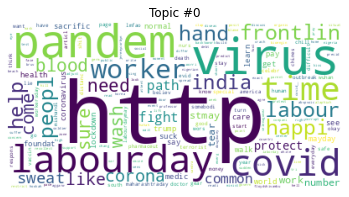

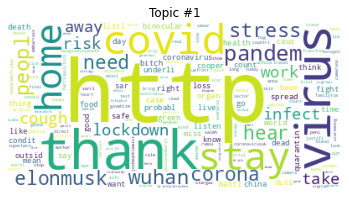

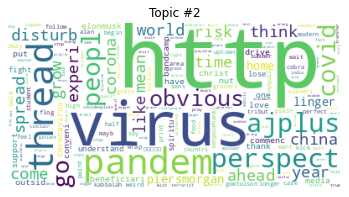

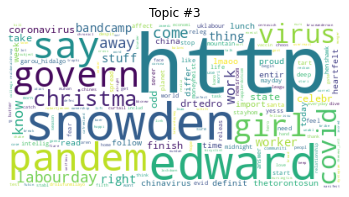

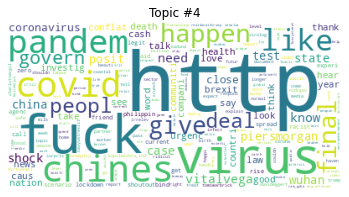

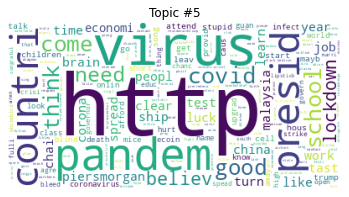

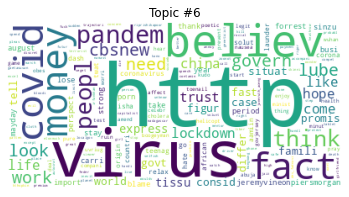

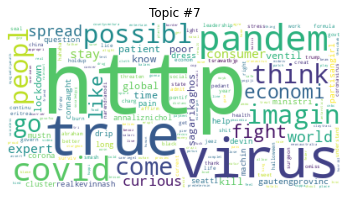

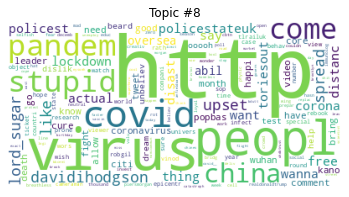

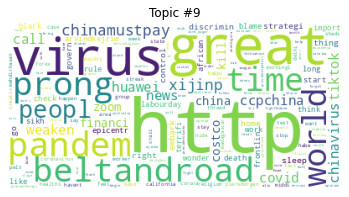

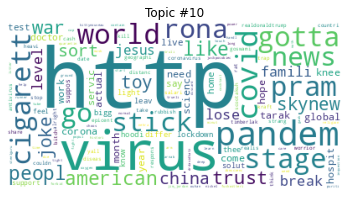

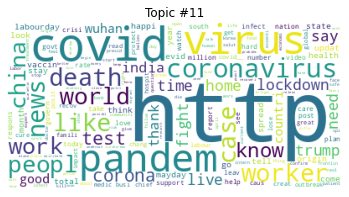

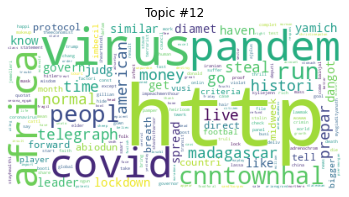

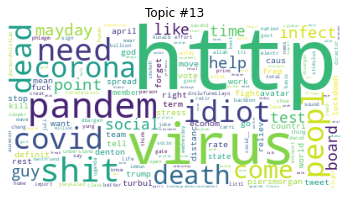

In [13]:
# generate word cloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()